# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Import Library
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi data
import numpy as np  # Mengimpor pustaka numpy untuk komputasi ilmiah
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
 
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Mengimpor LabelEncoder dan StandardScaler untuk preprocessing data
from sklearn.cluster import KMeans  # Mengimpor KMeans untuk clustering
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi data
from sklearn.compose import ColumnTransformer  # Mengimpor ColumnTransformer untuk transformasi kolom
from sklearn.pipeline import Pipeline  # Mengimpor Pipeline untuk menggabungkan beberapa transformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Load Dataset
file_path = "Dataset_clustering.csv"
df = pd.read_csv(file_path)  # Membaca dataset dengan format csv
df = pd.DataFrame(df)  # Mengubah dataset ke dalam dataframe

df.info()  # Menampilkan informasi dataset
df.describe(include="all") # Menampilkan deskripsi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


,provinsi,jenis,daerah,tahun,periode,gk
count,5460,5460,5460,5460.000000,5460,5261.000000
unique,35,3,3,NaN,2,NaN
top,ACEH,TOTAL,PERKOTAAN,NaN,MARET,NaN
freq,156,2100,1820,NaN,2730,NaN
mean,NaN,NaN,NaN,2018.115385,NaN,303904.185516
std,NaN,NaN,NaN,2.577159,NaN,158176.024903
min,NaN,NaN,NaN,2013.000000,NaN,48561.000000
25%,NaN,NaN,NaN,2016.000000,NaN,144674.000000
50%,NaN,NaN,NaN,2018.000000,NaN,313294.000000
75%,NaN,NaN,NaN,2020.000000,NaN,410188.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== 1. ANALISIS STRUKTUR DATA ===
Jumlah Baris: 5460 | Jumlah Kolom: 6

Tipe Data Kolom:
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object

Sample Data:


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0



=== 2. ANALISIS DATA HILANG ===


,Jumlah,Persentase
gk,199,3.644689



=== 3. ANALISIS DISTRIBUSI ===


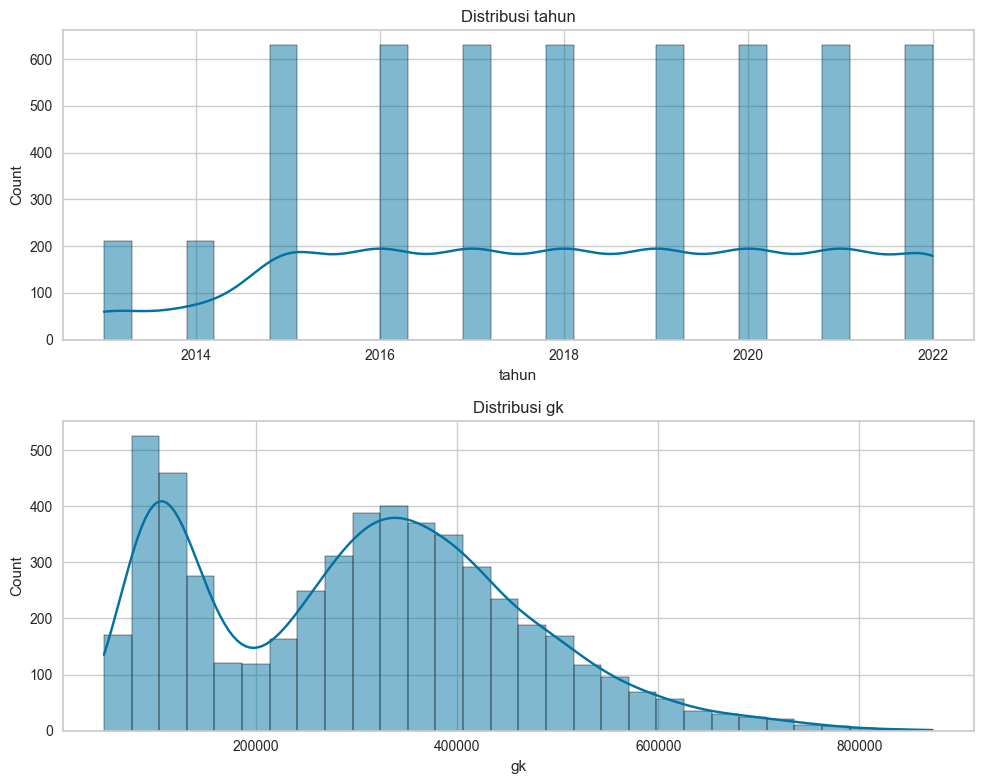

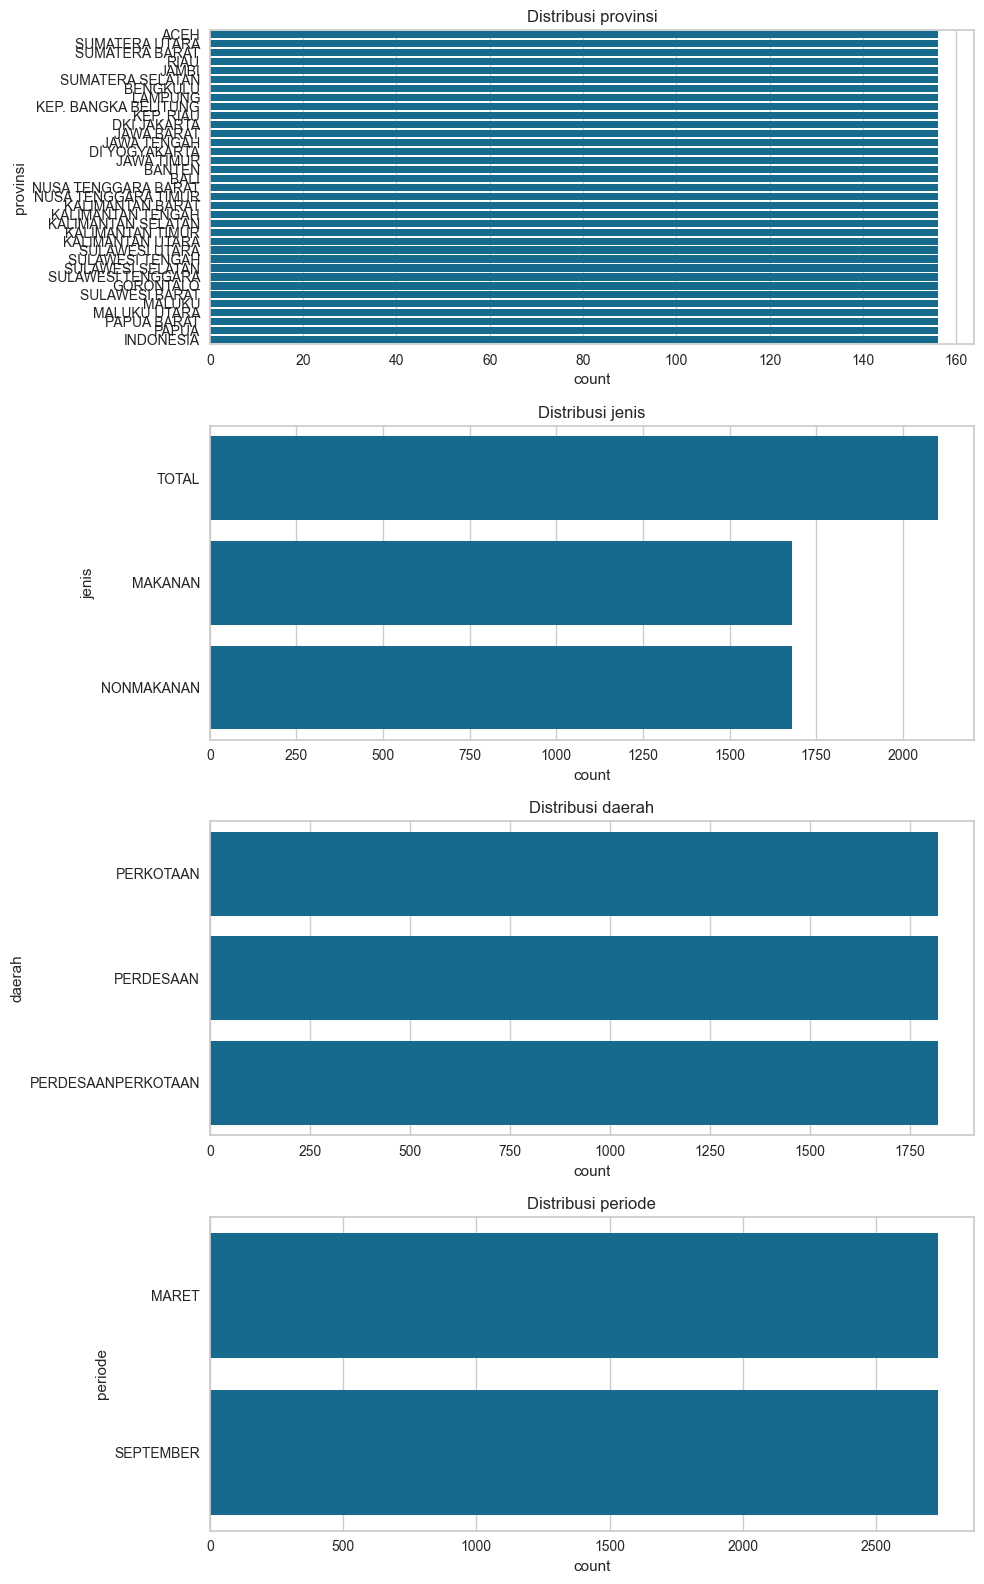


=== ANALISIS KORELASI ===


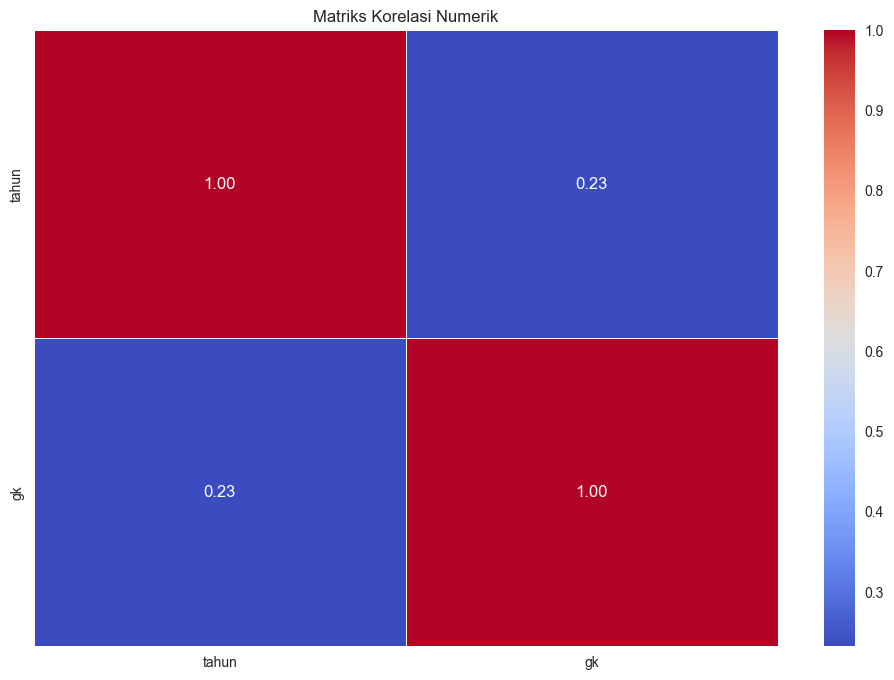


=== 4. VISUALISASI LANJUTAN ===


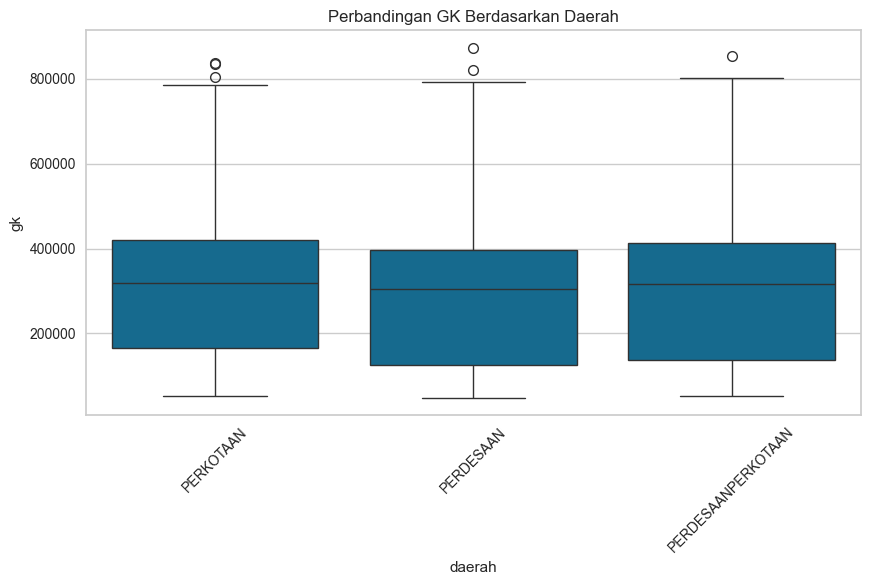

In [4]:
# =====================================================================
# 1. MEMAHAMI STRUKTUR DATA
# =====================================================================
print("=== 1. ANALISIS STRUKTUR DATA ===")
# Menampilkan dimensi dataset (baris x kolom)
print(f"Jumlah Baris: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")

# Analisis tipe data tiap kolom
print("\nTipe Data Kolom:")
print(df.dtypes)  # Menampilkan tipe data untuk setiap kolom

# Menampilkan 5 data pertama untuk inspeksi awal
print("\nSample Data:")
display(df.head())  # Fungsi display() digunakan di Jupyter Notebook

# =====================================================================
# 2. MENANGANI DATA HILANG
# =====================================================================
print("\n=== 2. ANALISIS DATA HILANG ===")
# Menghitung jumlah dan persentase data hilang per kolom
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Membuat DataFrame untuk data hilang yang diurutkan berdasarkan persentase
missing_df = pd.DataFrame({'Jumlah': missing, 'Persentase': missing_percent})
missing_df = missing_df[missing_df['Jumlah'] > 0].sort_values(
    by='Persentase', 
    ascending=False
)

# Menampilkan hasil jika ada data hilang
if not missing_df.empty:
    display(missing_df)  # Menampilkan tabel interaktif di Jupyter
else:
    print("Tidak ada data hilang ditemukan.")

# =====================================================================
# 3. ANALISIS DISTRIBUSI & KORELASI
# =====================================================================
print("\n=== 3. ANALISIS DISTRIBUSI ===")
# Memisahkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Visualisasi Distribusi Numerik
# -------------------------------
# Membuat histogram + KDE untuk setiap kolom numerik
fig, axes = plt.subplots(
    nrows=len(num_cols), 
    ncols=1, 
    figsize=(10, len(num_cols) * 4)  # Ukuran dinamis berdasarkan jumlah kolom
)
for i, col in enumerate(num_cols):
    sns.histplot(
        df[col], 
        kde=True,   # Menampilkan Kernel Density Estimate
        bins=30,    # Jumlah bin histogram
        ax=axes[i]  # Subplot tujuan
    )
    axes[i].set_title(f'Distribusi {col}')
plt.tight_layout()  # Adjust spacing antar subplot
plt.show()

# Visualisasi Distribusi Kategorikal
# ----------------------------------
# Membuat countplot untuk setiap kolom kategorikal
fig, axes = plt.subplots(
    nrows=len(cat_cols), 
    ncols=1, 
    figsize=(10, len(cat_cols) * 4))
for i, col in enumerate(cat_cols):
    sns.countplot(
        y=df[col], 
        order=df[col].value_counts().index,  # Urutkan berdasarkan frekuensi
        ax=axes[i]
    )
    axes[i].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Analisis Korelasi Numerik
# -------------------------
print("\n=== ANALISIS KORELASI ===")
corr_matrix = df[num_cols].corr()  # Hitung matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,    # Tampilkan nilai korelasi
    cmap='coolwarm',  # Peta warna biru-merah
    fmt='.2f',     # Format 2 desimal
    linewidths=0.5  # Garis pemisah
)
plt.title('Matriks Korelasi Numerik')
plt.show()

# =====================================================================
# 4. VISUALISASI LANJUTAN
# =====================================================================
print("\n=== 4. VISUALISASI LANJUTAN ===")
# Analisis komparasi daerah vs gk (jika kolom tersedia)
if 'daerah' in df.columns and 'gk' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        x='daerah', 
        y='gk', 
        data=df
    )
    plt.xticks(rotation=45)  # Rotasi label x-axis
    plt.title('Perbandingan GK Berdasarkan Daerah')
    plt.show()
else:
    print("Kolom 'daerah' atau 'gk' tidak ditemukan.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

=== Missing Values Sebelum Penanganan ===
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

=== Missing Values Setelah Penanganan ===
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64
Baris duplikat:
Empty DataFrame
Columns: [provinsi, jenis, daerah, tahun, periode, gk]
Index: []
Jumlah data setelah menghapus duplikat: 5460


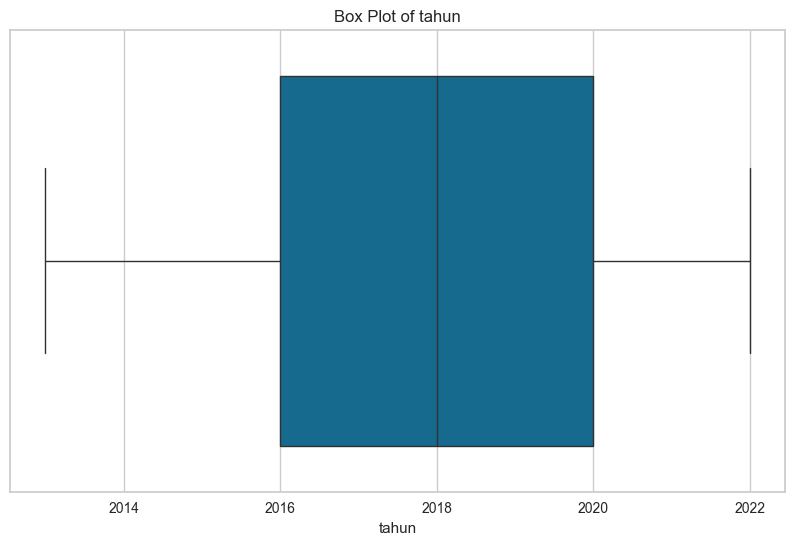

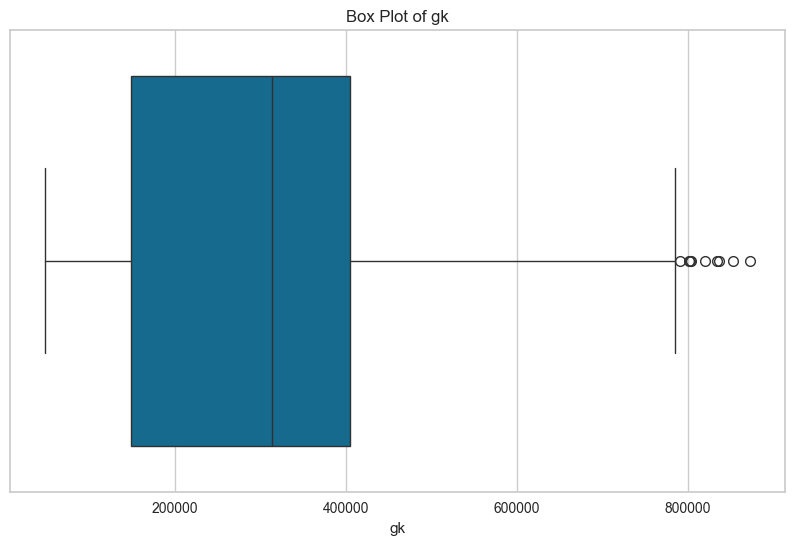


Data setelah normalisasi:
      tahun        gk provinsi    jenis     daerah    periode
0 -1.207697 -0.062952     ACEH  MAKANAN  PERKOTAAN      MARET
1 -1.207697 -0.008185     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER
2 -0.819265  0.018546     ACEH  MAKANAN  PERKOTAAN      MARET
3 -0.819265  0.106404     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER
4 -1.207697 -0.038385     ACEH  MAKANAN  PERDESAAN      MARET

Data setelah binning tahun:
         tahun        gk  provinsi  jenis  daerah  periode  tahun_kategori
0    -1.207697 -0.062952         0      0       2        0               2
1    -1.207697 -0.008185         0      0       2        1               2
2    -0.819265  0.018546         0      0       2        0               3
3    -0.819265  0.106404         0      0       2        1               3
4    -1.207697 -0.038385         0      0       0        0               2
...        ...       ...       ...    ...     ...      ...             ...
5455  1.511332  1.362740         7      2      

In [5]:
# ==============================================================================
# 1. HANDLING MISSING VALUES
# ==============================================================================
print("=== Missing Values Sebelum Penanganan ===")
print(df.isnull().sum())  # Menampilkan jumlah missing values per kolom

# Strategi penanganan:
# 1. Kolom numerik: isi dengan median
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(
    df[numerical_cols].median()  # Menggunakan median untuk isi nilai kosong
)

# 2. Kolom kategorikal: isi dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(
    df[categorical_cols].mode().iloc[0]  # Mengambil nilai paling sering
)

# Verifikasi hasil penanganan
print("\n=== Missing Values Setelah Penanganan ===")
print(df.isnull().sum())  # Memastikan tidak ada missing values tersisa

# ==============================================================================
# 2. MENGHAPUS DUPLIKAT
# ==============================================================================
# Identifikasi baris duplikat menggunakan fungsi duplicated()
duplicates = df.duplicated()
print("Baris duplikat:")
print(df[duplicates])  # Menampilkan baris yang terdeteksi duplikat

# Menghapus duplikat dan mempertahankan entry pertama
df = df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(df)}")  # Update jumlah data

# ==============================================================================
# 3. DETEKSI OUTLIER
# ==============================================================================
# Visualisasi box plot untuk setiap fitur numerik
for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Deteksi outlier menggunakan metode IQR (Interquartile Range)
Q1 = df[numerical_cols].quantile(0.25)  # Kuartil pertama
Q3 = df[numerical_cols].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1  # Rentang interkuartil

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR  # Batas bawah (Q1 - 1.5*IQR)
upper_bound = Q3 + 1.5 * IQR  # Batas atas (Q3 + 1.5*IQR)

# Filter data yang berada dalam rentang normal
condition = ~(
    (df[numerical_cols] < lower_bound) | 
    (df[numerical_cols] > upper_bound)
).any(axis=1)  # Cek outlier di semua kolom numerik

# Membuat dataframe baru tanpa outlier
df_filtered_numeric = df.loc[condition, numerical_cols]

# Menggabungkan kembali dengan data kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.concat(
    [df_filtered_numeric, df.loc[condition, categorical_cols]],
    axis=1  # Gabungkan berdasarkan kolom
)

# ==============================================================================
# 4. NORMALISASI/STANDARISASI
# ==============================================================================
# Menggunakan StandardScaler untuk normalisasi z-score
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(
    df[numerical_cols]  # Transformasi ke skala z (mean=0, std=1)
)

# Menampilkan 5 data pertama setelah normalisasi
print("\nData setelah normalisasi:")
print(df.head())

# ==============================================================================
# 5. ENCODING KATEGORIKAL
# ==============================================================================
# Inisialisasi dictionary untuk menyimpan encoder
encoders = {}  # Untuk menyimpan model encoder tiap kolom

# Label Encoding untuk kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Konversi kategori ke angka
    encoders[col] = le  # Simpan encoder untuk decoding nanti

# Membuat salinan dataframe hasil preprocessing
df_normalized = df.copy()

# ==============================================================================
# 6. BINNING 
# ==============================================================================
# Membuat kategori tahun dengan binning
bins = sorted(df_normalized['tahun'].unique())  # Ambil nilai unik tahun
labels = [
    '2013-2014', '2014-2015', '2015-2016', 
    '2016-2017', '2017-2018', '2018-2019', 
    '2019-2020', '2020-2021', '2021-2022'
]

# Proses binning menggunakan pd.cut()
df_normalized['tahun_kategori'] = pd.cut(
    df_normalized['tahun'],
    bins=bins,
    labels=labels,
    right=False  # Interval [awal, akhir)
)

# Encoding kategori tahun
label_encoder_kategori = LabelEncoder()
df_normalized['tahun_kategori'] = label_encoder_kategori.fit_transform(
    df_normalized['tahun_kategori']
)

# Menampilkan hasil akhir
print("\nData setelah binning tahun:")
print(df_normalized)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [6]:
# ==============================================================================
# A. PEMBANGUNAN MODEL CLUSTERING
# ==============================================================================
# Mengambil kolom tahun dan gk dari dataset untuk  menyimpannya dalam array X
X = df_normalized[['tahun', 'gk']].values

# Menampilkan data X
print(pd.DataFrame(X, columns=['tahun', 'gk']))

# Membangun model clustering dengan algoritma KMeans
# Jumlah cluster sementara (misalnya 4); nantinya dapat diperbaiki berdasarkan evaluasi
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_


         tahun        gk
0    -1.207697 -0.062952
1    -1.207697 -0.008185
2    -0.819265  0.018546
3    -0.819265  0.106404
4    -1.207697 -0.038385
...        ...       ...
5446  1.511332  1.362740
5447  1.122899  1.098711
5448  1.122899  1.187335
5449  1.511332  1.312708
5450  1.511332  1.508100

[5451 rows x 2 columns]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

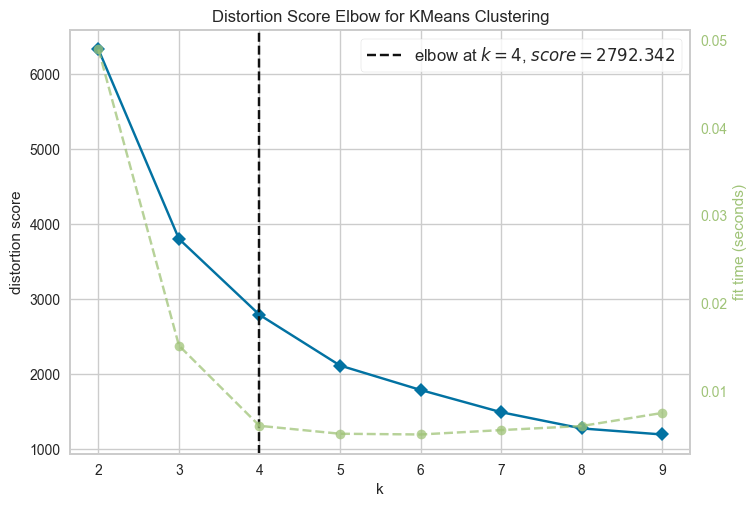

Silhouette Score untuk k=2: 0.382
Silhouette Score untuk k=3: 0.431
Silhouette Score untuk k=4: 0.429
Silhouette Score untuk k=5: 0.423
Silhouette Score untuk k=6: 0.395
Silhouette Score untuk k=7: 0.403
Silhouette Score untuk k=8: 0.410
Silhouette Score untuk k=9: 0.401


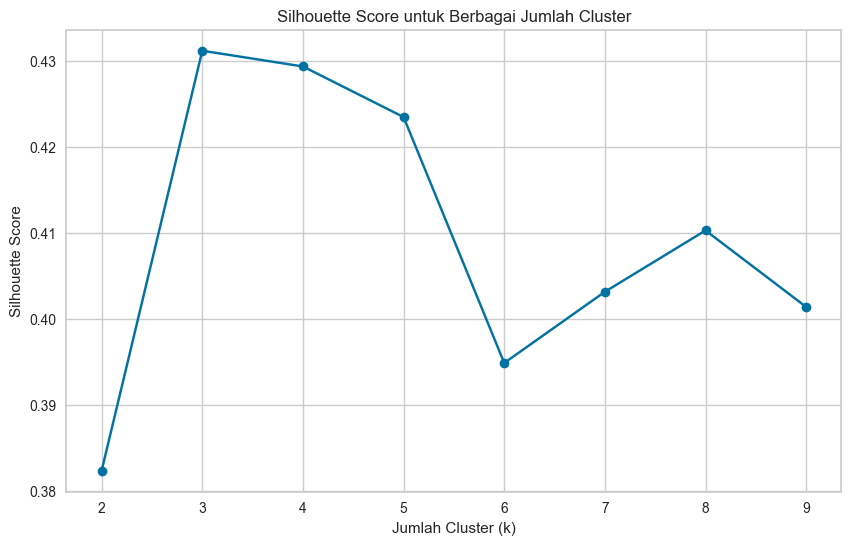


Rekomendasi Jumlah Cluster:
- Berdasarkan Elbow Method: 4 cluster
- Berdasarkan Silhouette Score: 3 cluster


In [7]:
# ==============================================================================
# 1. EVALUASI DENGAN ELBOW METHOD
# ==============================================================================
# Inisialisasi model KMeans dengan random_state untuk reproducibility
kmeans_elbow = KMeans(random_state=0)

# Membuat visualizer untuk Elbow Method
visualizer = KElbowVisualizer(
    kmeans_elbow, 
    k=(2, 10)  # Mengeksplorasi jumlah cluster dari 2 hingga 10
)

# Melatih visualizer dengan data (X)
visualizer.fit(X)

# Mendapatkan nilai k optimal berdasarkan Elbow Method
optimal_k_elbow = visualizer.elbow_value_  # Nilai k pada titik "siku"

# Menampilkan plot Elbow Method
visualizer.show()  # Opsional: Menampilkan grafik inersia vs jumlah cluster

# ==============================================================================
# 2. EVALUASI DENGAN SILHOUETTE SCORE
# ==============================================================================
# Inisialisasi list untuk menyimpan skor Silhouette
silhouette_scores = []

# Inisialisasi variabel untuk menyimpan skor Silhouette tertinggi
max_silhouette_score = -float('inf')  # Nilai awal sangat kecil untuk perbandingan

# Iterasi untuk mencoba jumlah cluster dari 2 hingga 9
for k in range(2, 10):
    # Inisialisasi model KMeans dengan jumlah cluster k
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    
    # Melatih model dan memprediksi label cluster
    labels_temp = kmeans_temp.fit_predict(X)
    
    # Menghitung Silhouette Score
    score = silhouette_score(X, labels_temp)
    
    # Menyimpan skor ke dalam list
    silhouette_scores.append(score)
    
    # Menampilkan skor untuk setiap k
    print(f"Silhouette Score untuk k={k}: {score:.3f}")
    
    # Memeriksa apakah skor saat ini lebih tinggi dari skor maksimum sebelumnya
    if score > max_silhouette_score:
        max_silhouette_score = score  # Update skor maksimum

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')  # Plot skor vs jumlah cluster
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)  # Menambahkan grid untuk memudahkan pembacaan
plt.show()

# Menentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  
# +2 karena iterasi dimulai dari k=2

# ==============================================================================
# 3. REKOMENDASI JUMLAH CLUSTER
# ==============================================================================
print("\nRekomendasi Jumlah Cluster:")
print(f"- Berdasarkan Elbow Method: {optimal_k_elbow} cluster")
print(f"- Berdasarkan Silhouette Score: {optimal_k_silhouette} cluster")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.


Jumlah fitur asli: 7, setelah PCA: 2
Silhouette Score dengan feature selection (PCA): 0.418
Silhouette Score model asli: 0.431


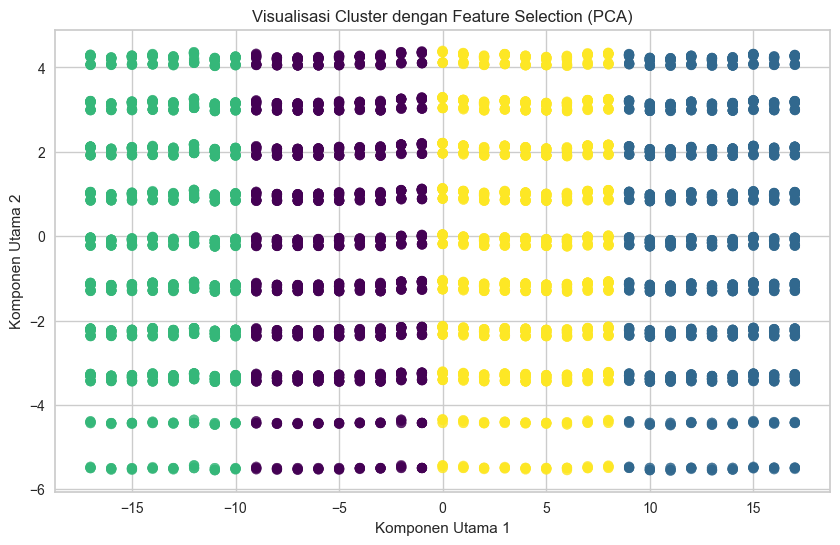

In [8]:
# ==============================================================================
# 1. REDUKSI DIMENSI DENGAN PCA
# ==============================================================================
# Mengambil semua fitur dari dataset yang sudah dinormalisasi
features = df_normalized.columns  # Menggunakan semua kolom yang tersedia

# Menyiapkan data untuk PCA
X_full = df_normalized[features].values  # Mengambil nilai dari DataFrame

# Melakukan reduksi dimensi dengan PCA
pca = PCA(
    n_components=0.95,  # Mempertahankan 95% varians data
    random_state=0      # Untuk reproducibility
)
X_pca = pca.fit_transform(X_full)  # Transformasi data ke ruang PCA

# Menampilkan jumlah fitur sebelum dan setelah PCA
print(f"\nJumlah fitur asli: {X_full.shape[1]}, setelah PCA: {X_pca.shape[1]}")

# ==============================================================================
# 2. MEMBANGUN MODEL CLUSTERING DENGAN DATA HASIL PCA
# ==============================================================================
# Inisialisasi model KMeans dengan jumlah cluster optimal dari Elbow Method
kmeans_pca = KMeans(
    n_clusters=optimal_k_elbow,  # Jumlah cluster optimal dari Elbow Method
    random_state=0               # Untuk reproducibility
)

# Melatih model dengan data hasil PCA
kmeans_pca.fit(X_pca)

# Mendapatkan label cluster untuk setiap data point
labels_pca = kmeans_pca.labels_

# ==============================================================================
# 3. EVALUASI MODEL CLUSTERING DENGAN SILHOUETTE SCORE
# ==============================================================================
# Menghitung Silhouette Score untuk model dengan data hasil PCA
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score dengan feature selection (PCA): {score_pca:.3f}")

# Membandingkan dengan performa model asli (tanpa PCA)
score_original = max_silhouette_score  # Silhouette Score model asli
print(f"Silhouette Score model asli: {score_original:.3f}")

# ==============================================================================
# 4. VISUALISASI HASIL CLUSTERING
# ==============================================================================
# Visualisasi hasil clustering menggunakan 2 komponen utama pertama dari PCA
plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[:, 0],  # Komponen Utama 1 (sumbu x)
    X_pca[:, 1],  # Komponen Utama 2 (sumbu y)
    c=labels_pca,  # Warna berdasarkan label cluster
    cmap='viridis',  # Peta warna
    s=50,           # Ukuran titik
    alpha=0.6       # Transparansi titik
)
plt.title('Visualisasi Cluster dengan Feature Selection (PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

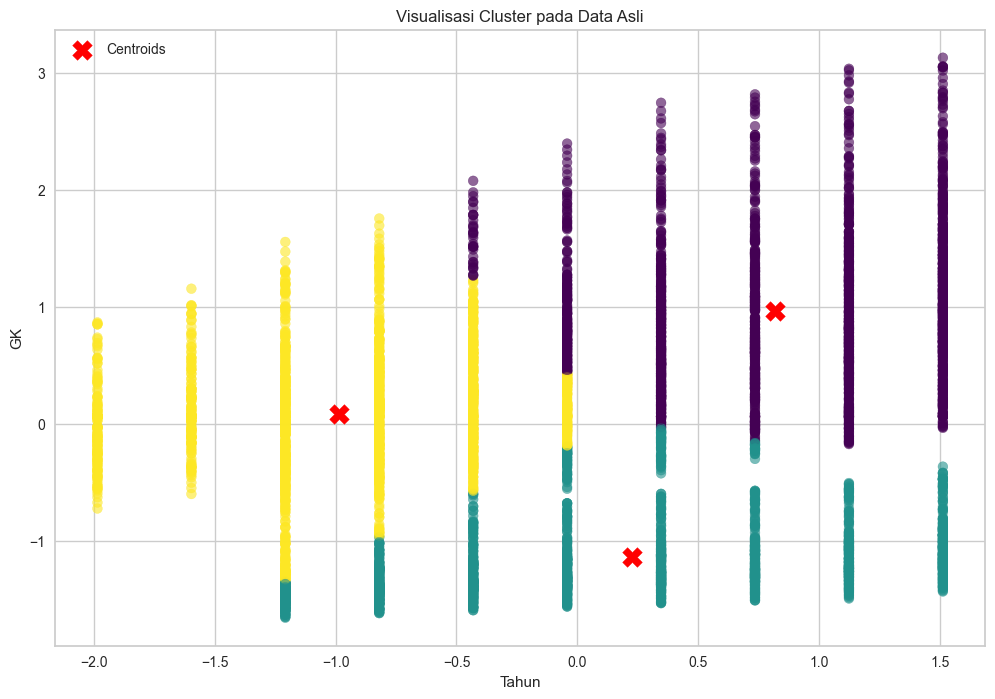

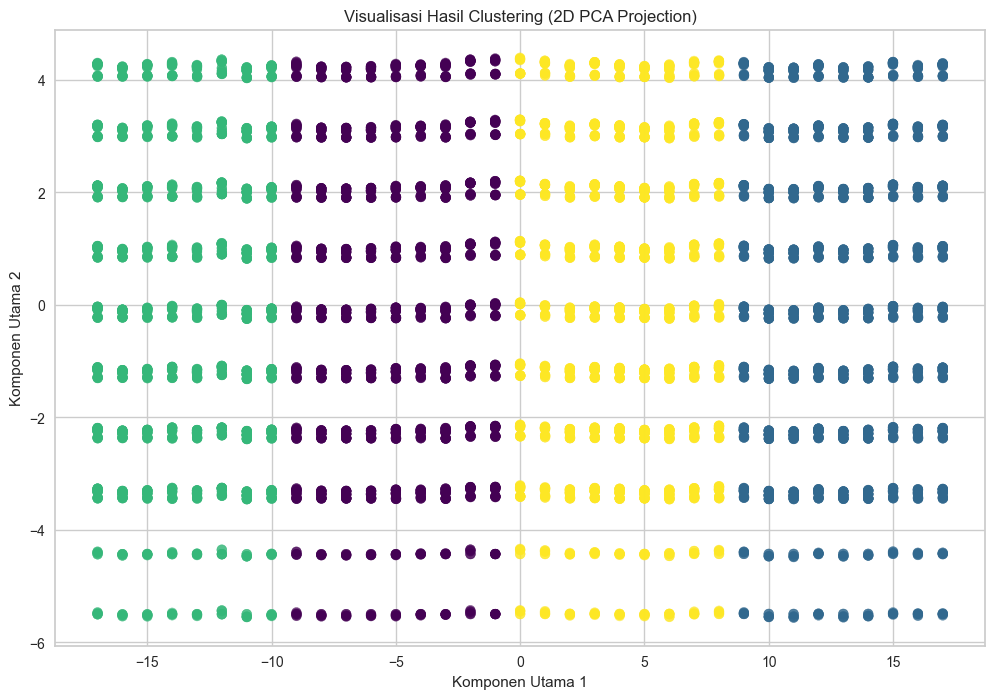

In [9]:
# ==============================================================================
# 1. VISUALISASI PADA DATA ASLI (UNTUK DATASET DENGAN 2 FITUR)
# ==============================================================================
# Contoh: Jika dataset hanya memiliki 2 fitur (misal 'tahun' dan 'gk')
plt.figure(figsize=(12, 8))

# Scatter plot untuk data asli dengan warna berdasarkan label cluster
plt.scatter(
    X[:, 0],         # Fitur pertama (misal 'tahun')
    X[:, 1],         # Fitur kedua (misal 'gk')
    c=labels,        # Warna berdasarkan label cluster
    cmap='viridis',  # Peta warna
    s=50,            # Ukuran titik
    alpha=0.6        # Transparansi titik
)

# Menambahkan centroid ke dalam plot
centroids = kmeans_model.cluster_centers_  # Mendapatkan koordinat centroid
plt.scatter(
    centroids[:, 0],  # Koordinat x centroid
    centroids[:, 1],  # Koordinat y centroid
    c='red',          # Warna centroid
    s=200,            # Ukuran titik centroid
    marker='X',       # Bentuk marker (X)
    label='Centroids' # Label untuk legend
)

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Cluster pada Data Asli')
plt.xlabel('Tahun')  # Label sumbu x
plt.ylabel('GK')     # Label sumbu y
plt.legend()         # Menampilkan legend
plt.show()

# ==============================================================================
# 2. VISUALISASI PADA DATA HASIL PCA (UNTUK DATASET DENGAN BANYAK FITUR)
# ==============================================================================
# Visualisasi hasil clustering menggunakan 2 komponen utama pertama dari PCA
plt.figure(figsize=(12, 8))

# Scatter plot untuk data hasil PCA dengan warna berdasarkan label cluster
plt.scatter(
    X_pca[:, 0],     # Komponen Utama 1 (sumbu x)
    X_pca[:, 1],     # Komponen Utama 2 (sumbu y)
    c=labels_pca,    # Warna berdasarkan label cluster
    cmap='viridis',  # Peta warna
    s=50,            # Ukuran titik
    alpha=0.6        # Transparansi titik
)

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Hasil Clustering (2D PCA Projection)')
plt.xlabel('Komponen Utama 1')  # Label sumbu x
plt.ylabel('Komponen Utama 2')  # Label sumbu y
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [10]:
# Tahap E: Analisis dan Interpretasi Hasil Cluster
########################################
# 1. Tambahkan Hasil Label Cluster ke DataFrame
df_normalized['cluster'] = kmeans_model.labels_



# Inverse transform untuk kolom-kolom kategorikal (selain kolom khusus yang di-encode terpisah)
# Misalnya, kolom-kolom yang awalnya di-encode dengan masing-masing encoder dalam dictionary "encoders"
df_original = df_normalized.copy()  # Membuat DataFrame baru untuk data asli

# 2. Lakukan Inverse Transform pada feature yang sudah diubah

# Inverse transform untuk data numerik (misalnya, 'tahun' dan 'gk')
df_original[['tahun', 'gk']] = scaler.inverse_transform(df_normalized[['tahun', 'gk']])

for col in categorical_cols:
    # Pastikan kolom yang di-inverse transform hanya yang asli, bukan kolom hasil clustering
    df_original[col] = encoders[col].inverse_transform(df_normalized[col])

# Jika ada kolom khusus (misalnya, 'tahun_kategori') yang di-encode dengan encoder terpisah,
# lakukan inverse transform pada kolom tersebut
df_original['tahun_kategori'] = label_encoder_kategori.inverse_transform(df_normalized['tahun_kategori'])

# 3. Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau buat DataFrame baru
# (Dalam contoh ini, df_original sudah merupakan DataFrame baru yang berisi data asli)

print("Data asli setelah inverse transform:")
print(df_original.head())

Data asli setelah inverse transform:
    tahun        gk provinsi    jenis     daerah    periode tahun_kategori  \
0  2015.0  293697.0     ACEH  MAKANAN  PERKOTAAN      MARET      2015-2016   
1  2015.0  302128.0     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER      2015-2016   
2  2016.0  306243.0     ACEH  MAKANAN  PERKOTAAN      MARET      2016-2017   
3  2016.0  319768.0     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER      2016-2017   
4  2015.0  297479.0     ACEH  MAKANAN  PERDESAAN      MARET      2015-2016   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [11]:
df_original[['tahun', 'gk']] = scaler.inverse_transform(df_normalized[['tahun', 'gk']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Statistik Deskriptif per Cluster:
               tahun                               gk                         
                mean  median       std           mean    median            std
cluster                                                                       
0        2020.212452  2020.0  1.373909  452364.991808  433925.0  103618.022146
1        2018.702290  2019.0  2.125065  128497.168526  113254.0   54183.188433
2        2015.573292  2016.0  1.437812  316461.643192  313294.0   77399.417887


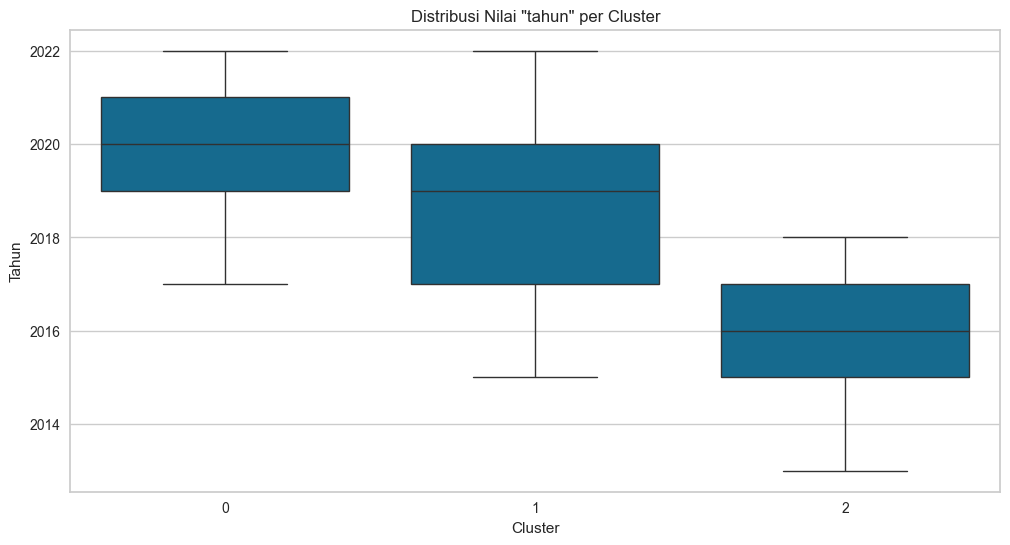

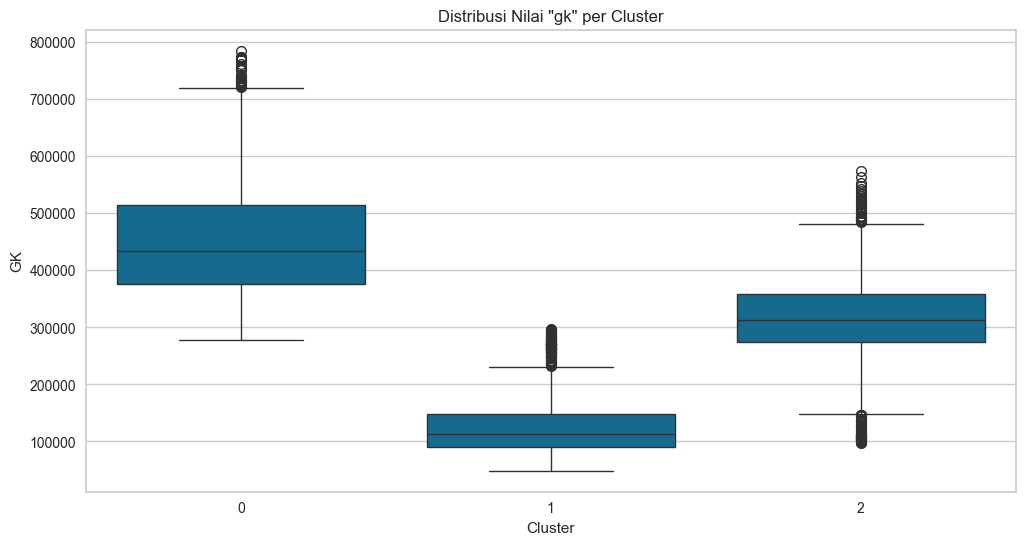

In [12]:
# ==============================================================================
# 1. ANALISIS STATISTIK DESKRIPTIF PER CLUSTER
# ==============================================================================
# Mengelompokkan data berdasarkan kolom 'cluster' dan menghitung statistik deskriptif
# untuk fitur 'tahun' dan 'gk'
cluster_stats = df_original.groupby('cluster')[['tahun', 'gk']].agg(
    ['mean', 'median', 'std']  # Menghitung mean, median, dan standar deviasi
)

# Menampilkan hasil statistik deskriptif
print("Statistik Deskriptif per Cluster:")
print(cluster_stats)

# ==============================================================================
# 2. VISUALISASI DISTRIBUSI 'TAHUN' PER CLUSTER
# ==============================================================================
# Membuat boxplot untuk melihat distribusi nilai 'tahun' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cluster',  # Sumbu x: Cluster
    y='tahun',    # Sumbu y: Nilai 'tahun'
    data=df_original  # Data yang digunakan
)
plt.title('Distribusi Nilai "tahun" per Cluster')
plt.xlabel('Cluster')  # Label sumbu x
plt.ylabel('Tahun')    # Label sumbu y
plt.show()

# ==============================================================================
# 3. VISUALISASI DISTRIBUSI 'GK' PER CLUSTER
# ==============================================================================
# Membuat boxplot untuk melihat distribusi nilai 'gk' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cluster',  # Sumbu x: Cluster
    y='gk',       # Sumbu y: Nilai 'gk'
    data=df_original  # Data yang digunakan
)
plt.title('Distribusi Nilai "gk" per Cluster')
plt.xlabel('Cluster')  # Label sumbu x
plt.ylabel('GK')       # Label sumbu y
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## 1. Cluster 1:
- **Rata-rata nilai tahun:** 2020
- **Rata-rata nilai gk:** 452364.99
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.
## 2. Cluster 2:
- **Rata-rata nilai tahun:** 2018
- **Rata-rata nilai gk:** 128497.17
- **Analisis:**  Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.
## 3. Cluster 3:
- **Rata-rata nilai tahun:** 2015
- **Rata-rata nilai gk:** 316461.64
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
# Simpan DataFrame df_original ke file CSV tanpa menyertakan index
df_original.to_csv('Dataset_inisiasi.csv', index=False)
print("Data telah diekspor ke 'Dataset_inisiasi.csv'")

Data telah diekspor ke 'Dataset_inisiasi.csv'
